In [25]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
import json
import pandas as pd
import random
from cfae import Simple_CF_Ascent

%load_ext autoreload
%autoreload 2 


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Counterfactual-Ascent workspace

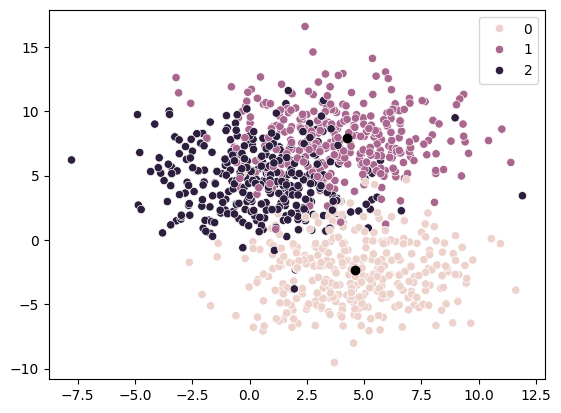

In [26]:
X, y, centers = make_blobs(centers=3, cluster_std=2.5, n_features=2, n_samples=1000, return_centers=True)

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)
plt.scatter(x=centers[0][0], y=centers[0][1],color="black")
plt.scatter(x=centers[1][0], y=centers[1][1],color="black")

In [27]:
model = KMeans(n_clusters=3)
model.fit(X)
pred = model.predict(X)
pred = [str(l) for l in pred]
stacked = np.column_stack((X, pred))
df = pd.DataFrame(stacked, columns=[f'x{i+1}' for i in range(X.shape[1])]+['label'], dtype=float)
df

,x1,x2,label
0,-0.761583,4.573562,1.0
1,3.337627,-3.069747,0.0
2,4.073478,10.549983,2.0
3,5.350176,5.185729,2.0
4,3.835660,7.671568,2.0
...,...,...,...
995,7.041697,-2.076498,0.0
996,3.332629,7.325779,2.0
997,2.637897,7.963421,2.0
998,4.881475,-3.280632,0.0


In [28]:
x,cf,h = Simple_CF_Ascent(df=df, target=1.0, centers=centers, model=model, center_mode=False)

In [29]:
print(model.predict(np.array(cf).reshape(1,-1)))

[1]


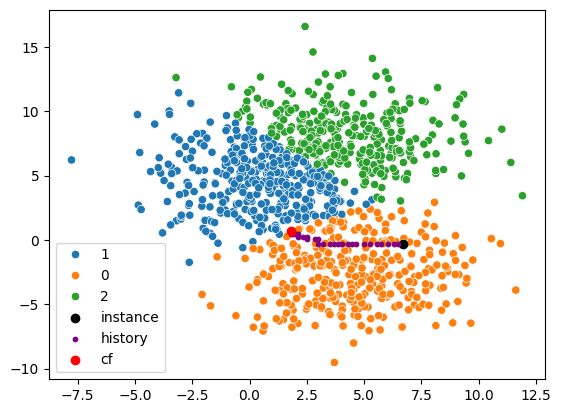

In [30]:
hx = list(zip(*h))[0]
hy = list(zip(*h))[1]

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=pred)
plt.scatter(x=x[0],y=x[1],color='black',label='instance')
plt.scatter(x=hx, y=hy, color='purple', label='history',s=10)
plt.scatter(x=cf[0],y=cf[1],color='red', label='cf')
plt.legend()

## PCA attempt

<Axes: >

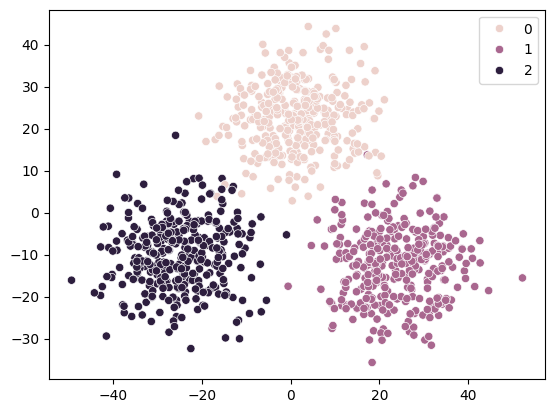

In [31]:
X, y, centers = make_blobs(centers=3, cluster_std=8, n_features=25, n_samples=1000, return_centers=True)

pca = PCA(n_components=2)
embed_X = pca.fit_transform(X)
sns.scatterplot(x=embed_X[:, 0], y=embed_X[:, 1], hue=y)

In [32]:
model = RandomForestClassifier()
model.fit(X, y)
pred = model.predict(X)
pred = [str(l) for l in pred]
stacked = np.column_stack((X, pred))
df = pd.DataFrame(stacked, columns=[f'x{i+1}' for i in range(X.shape[1])]+['label'], dtype=float)
df

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x17,x18,x19,x20,x21,x22,x23,x24,x25,label
0,0.336201,-6.201569,5.465156,0.211954,2.816570,1.542577,17.964637,-17.855783,10.098549,2.639449,...,-1.401585,8.249763,-6.990471,4.573739,-4.366473,-18.174988,9.430013,12.202561,-2.183575,0.0
1,-3.686293,-5.313539,-5.159025,-5.914988,12.170984,3.324773,-0.664444,-1.534767,17.141119,11.783841,...,-8.700509,9.955071,14.847530,12.239934,14.170583,10.107122,-16.374805,25.970777,10.887396,1.0
2,4.516884,-3.718262,11.991989,8.329098,-12.089730,-10.239354,6.680264,-11.476449,6.432819,14.045642,...,-11.050021,-13.656325,2.918587,-19.240209,-1.994039,3.343385,-15.474448,-18.097019,8.705289,2.0
3,1.002112,-8.166399,8.416715,-11.836875,3.004068,10.531112,0.833107,-21.073658,18.411195,-2.649706,...,11.228586,4.668167,-12.234011,2.171573,1.361907,-1.515944,13.420095,13.270931,10.166778,0.0
4,4.135041,-6.861645,-21.057326,-2.367893,2.011843,10.526130,10.615965,7.980180,-3.885725,4.933623,...,-1.968613,4.166728,-17.654301,19.036114,-0.112084,3.512174,-2.293119,4.449185,9.724312,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-9.542511,-11.638636,10.611105,4.821093,0.543558,-9.901056,-15.528796,-7.732421,1.075340,-10.317000,...,-21.028313,3.036416,18.111486,-11.895161,1.852613,-1.402943,-2.628305,-2.348803,-4.483814,2.0
996,11.602067,-14.412651,15.842456,6.377842,-13.034143,-6.596173,-18.819214,-13.757089,0.535239,-1.129884,...,-4.727003,-14.112121,15.921201,-11.621884,1.597977,-0.798296,1.739799,-1.631203,8.497759,2.0
997,8.015906,-4.885572,5.198886,-12.897230,9.037065,9.064939,13.214196,-14.267874,-5.490802,14.620875,...,12.225793,7.513189,8.135067,6.948855,-7.598295,-1.903570,-3.255810,11.696825,2.390222,0.0
998,-0.112472,6.708435,1.396323,1.018513,-0.033930,-15.161163,-2.155696,-11.965634,-1.276459,15.494744,...,-6.313840,0.141857,2.036684,-16.007121,8.782854,15.369251,-6.018545,-12.751788,8.073652,2.0


In [33]:
x,cf,h = Simple_CF_Ascent(df=df, target=1.0, centers=centers)

In [34]:
cf_pca = pca.transform([cf])[0]

h_pca = pca.transform(h)

hx = list(zip(*h_pca))[0]
hy = list(zip(*h_pca))[1]

x_pca = pca.transform([x])[0]

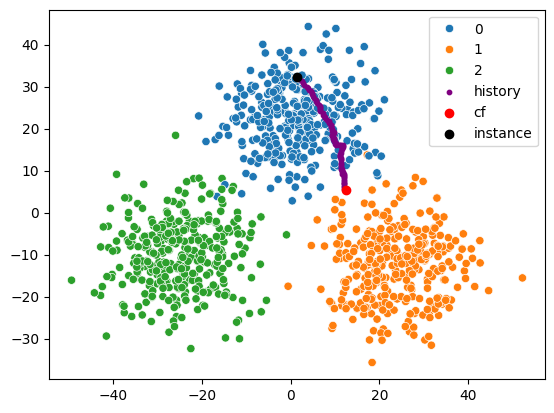

In [35]:

sns.scatterplot(x=embed_X[:, 0], y=embed_X[:, 1], hue=pred)
plt.scatter(x=hx, y=hy, color='purple', label='history',s=10)
plt.scatter(x=cf_pca[0],y=cf_pca[1],color='red', label='cf')
plt.scatter(x=x_pca[0],y=x_pca[1],color='black',label='instance')
plt.legend()